In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as Image

In [2]:
img = cv2.imread("img.png")

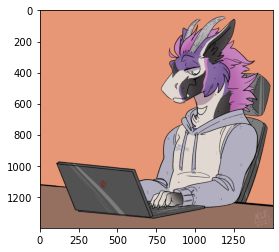

In [3]:
plt.imshow(img[:,:,::-1])

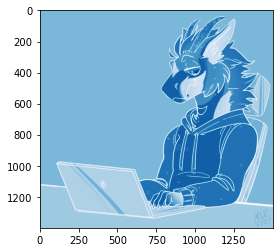

In [4]:
b,g,r = cv2.split(img)

plt.imshow(r,cmap="Reds")
plt.imshow(b,cmap="Blues")

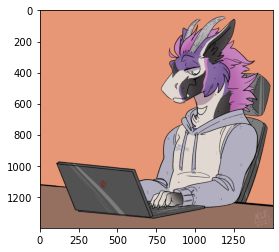

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

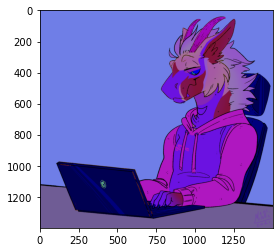

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))

In [7]:
img[0,2]

array([231, 151, 117], dtype=uint8)

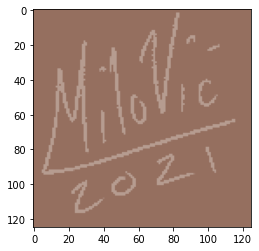

In [8]:
copy = img.copy()
copy = copy[1275:5000, 1375:5000]
plt.imshow(copy)

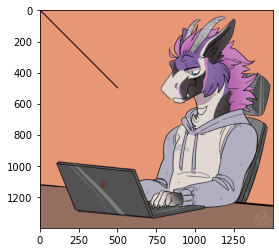

In [9]:
line = img.copy()

plt.imshow(cv2.line(line,(0,0),(500,500),(0,0,0), thickness=5));

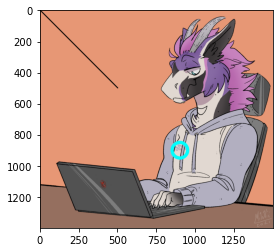

In [10]:
plt.imshow(cv2.circle(line,(900,900),50,(0,255,255),thickness=20))

Text(0.5, 1.0, 'Normal')

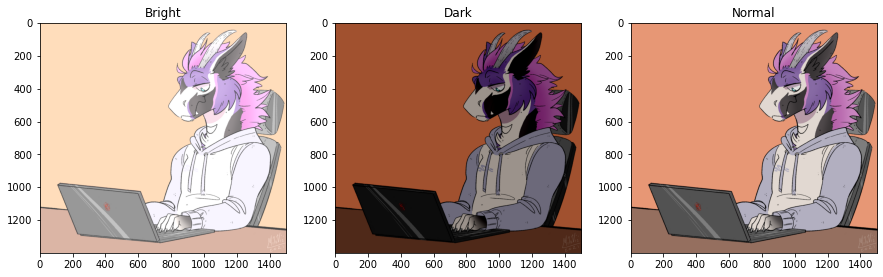

In [11]:
matrix = np.ones(img.shape,dtype="uint8") * 70

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(cv2.add(img, matrix))
plt.title("Bright")

plt.subplot(132)
plt.imshow(cv2.subtract(img, matrix))
plt.title("Dark")

plt.subplot(133)
plt.imshow(img)
plt.title("Normal")

In [12]:
img = cv2.imread(r"montagne.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Normal')

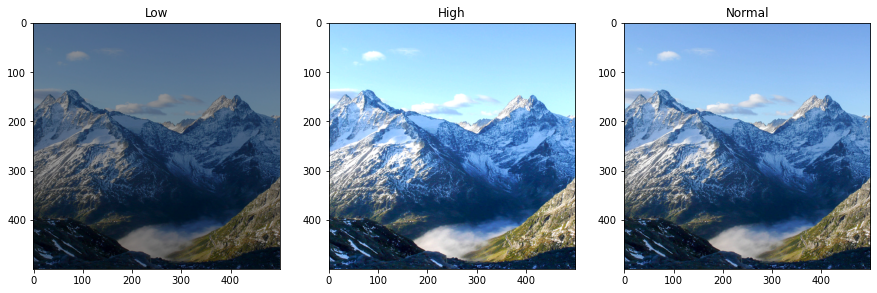

In [13]:
matrix1 = np.ones(img.shape) * 0.6
matrix2 = np.ones(img.shape) * 1.2
bright = np.uint8(cv2.multiply(np.float64(img), matrix1))
dark = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2),0,255))


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(bright)
plt.title("Low")

plt.subplot(132)
plt.imshow(dark)
plt.title("High")

plt.subplot(133)
plt.imshow(img)
plt.title("Normal")

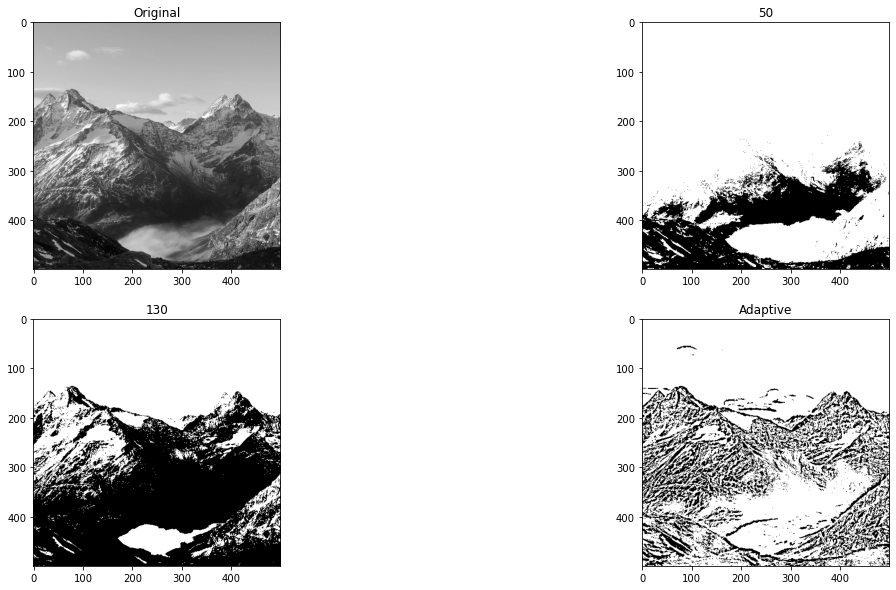

In [14]:
nb = cv2.imread(r"montagne.jpg", cv2.IMREAD_GRAYSCALE)

_, th1 = cv2.threshold(nb, 50, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(nb, 130, 255, cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(nb, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(nb, cmap="gray")
plt.title("Original")
plt.subplot(222)
plt.imshow(th1, cmap="gray")
plt.title("50")
plt.subplot(223)
plt.imshow(th2, cmap="gray")
plt.title("130")
plt.subplot(224)
plt.imshow(th3, cmap="gray")
plt.title("Adaptive");

(800, 800, 3)


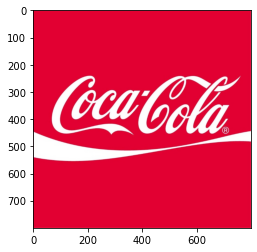

In [15]:
bgr = cv2.imread(r"coca.jpg")
logo = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(logo)
logo_w = logo.shape[1]
logo_h = logo.shape[0]
print(logo.shape)

1.5 (800, 800, 3)


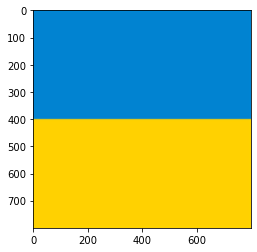

In [16]:
bgr = cv2.imread(r"ukraine1.png")
ukr = cv2.cvtColor(bgr, cv2.COLOR_RGB2BGR)

ratio = (ukr.shape[1] / ukr.shape[0])
dim = (logo_w, int(logo_w/ratio))

ukr = cv2.resize(ukr, logo.shape[:2], interpolation=cv2.INTER_AREA)
plt.imshow(ukr)
print(ratio, ukr.shape)

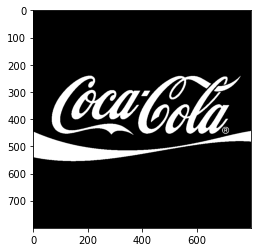

In [17]:
logo_nb = cv2.cvtColor(logo, cv2.COLOR_RGB2GRAY)

_,img_mask = cv2.threshold(logo_nb, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_mask,cmap="gray")

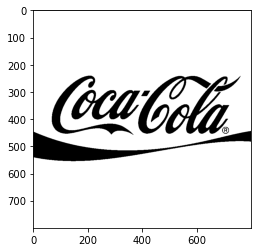

In [18]:
_,inversed_mask = cv2.threshold(logo_nb, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(inversed_mask, cmap="gray")

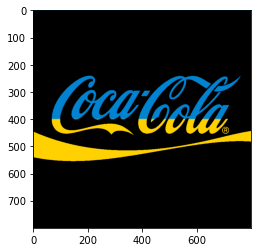

In [19]:
ukr_mask = cv2.bitwise_and(ukr, ukr, mask=img_mask)
plt.imshow(ukr_mask)

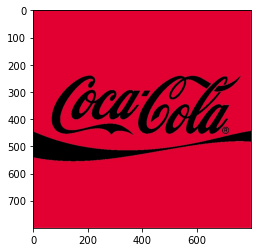

In [20]:
fg = cv2.bitwise_or(logo, logo, mask=inversed_mask)
plt.imshow(fg)

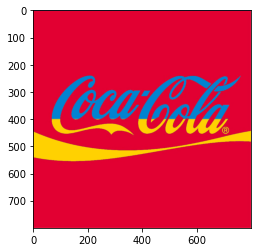

In [21]:
final = cv2.add(fg, ukr_mask)
plt.imshow(final)